# Tarea 4: Entrenando un modelo de Regresión Lineal y un modelo de Regresión Logística con el algoritmo de optimización descenso de gradiente.

Profesor: Dr. Rodrigo López Farías  

Alumno: Colvert Gomez Rubio

### Conjunto de datos para el ejercicio 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

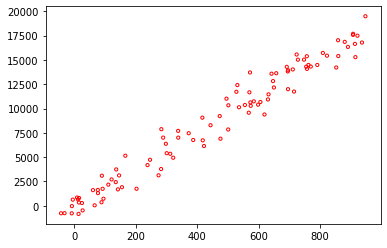

In [2]:
data = pd.read_csv("DATOS/entrenamiento_linealRegression.csv")
x = data["X"].to_numpy()
y = data["Y"].to_numpy()

fig, ax = plt.subplots()
ax.scatter(x, y, s=10, facecolors='none', edgecolors='r')
plt.show() 

In [3]:
x.shape, y.shape

((100,), (100,))

Definimos la función de costo cuadrática que queremos minimizar.

$C(\theta) = \frac{1}{n}\sum_{i=1}^n [(w \cdot x_i + b) - y_i]^2 $

Y necesitamos su derivada

$\frac{\delta C_i }{\delta w} = \frac{1}{n} \sum_{i=1}^n 2 [(w \cdot x_i + b) - y_i] \cdot x_i$

$\frac{\delta C_i }{\delta b} = \frac{1}{n} \sum_{i=1}^n 2 [(w \cdot x_i + b) - y_i]$

In [4]:
#La programación de la derivada de la función de costo 
def pdw(x,y,a,b,n_sum):
    s = 0
    for i in np.arange(len(x)):
        deriv = (1/n_sum)*(2*(a*x[i]+b-y[i])*x[i])
        s = s + deriv
    return s 

def pdb(x,y,a,b,n_sum):
    s = 0
    for i in np.arange(len(x)):
        deriv = (1/n_sum)*(2*(a*x[i]+b-y[i]))
        s = s + deriv
    return s 

In [5]:
#condicion inicial del parámetro
av = 40
lav = list([av])

bv = 0
lbv = list([bv])

#tamaño de paso
n = 0.0000001

n_sum = 10000

for it in np.arange(n_sum):
    
    #derivada parcial
    dpw = pdw(x,y,av,bv,n_sum)
    dpb = pdb(x,y,av,bv,n_sum)
    
    an = av-n*dpw
    av = an
    lav.append(av)
    
    bn = bv-n*dpb
    bv = bn
    lbv.append(bv)
    
print("Estimación")
print("w =",av)
print("b =",bv)

Estimación
w = 18.99240474381037
b = -0.03254686113108464


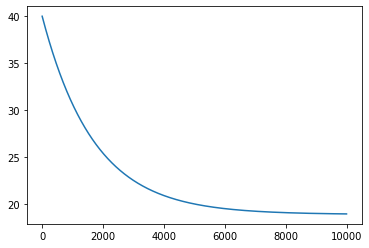

In [6]:
plt.plot(lav)

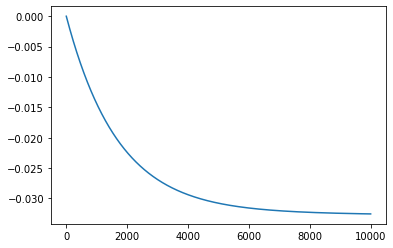

In [7]:
plt.plot(lbv)

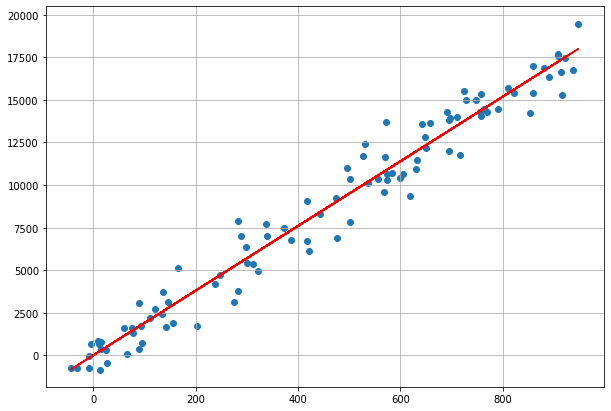

In [8]:
fig = plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(x,av*x+bv, c="r")
plt.grid()
plt.show()

In [9]:
y_pred = av * x + bv
mean_squared_error(y, y_pred)

1197872.4213457247

### Conjunto de datos para el ejercicio 2.

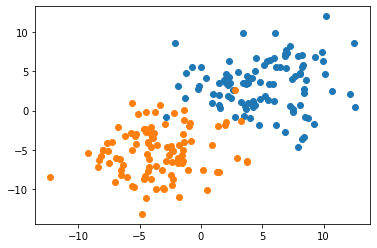

In [10]:
df = pd.read_csv("DATOS/entrenamiento_logisticRegression_withoutbias.csv")

class00 = df.iloc[:100,1:4]
class01 = df.iloc[100:,1:4]

plt.scatter(class00.iloc[:,0],class00.iloc[:,1])
plt.scatter(class01.iloc[:,0],class01.iloc[:,1])
plt.show()

In [11]:
class00.shape, class01.shape

((100, 3), (100, 3))

In [12]:
print(class00.head(3))
print(class01.head(3))

        X_1       X_2  Y
0  2.391487  3.483958  0
1  3.284639  1.073533  0
2  5.197476  1.811780  0
          X_1       X_2  Y
100 -1.421788 -1.193947  1
101  2.789563  2.592341  1
102 -5.448053 -9.710852  1


In [13]:
data = pd.concat([class00, class01], axis=0)

In [14]:
data.shape

(200, 3)

In [15]:
data = data.to_numpy()

In [16]:
X = data[:, :2] 
y = data[:, -1].reshape((-1, 1))
print(X.shape, y.shape)

(200, 2) (200, 1)


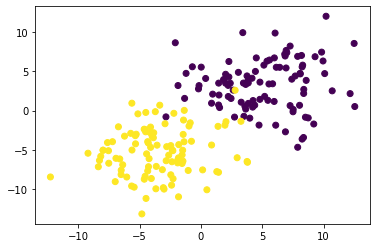

In [17]:
plt.scatter(X[: ,0],X[: ,1], c=y)
plt.show()

In [18]:
def fsigm(x):
    return 1 / (1 + np.exp(-x))

def fpred(x, w, b=0):
    return fsigm(np.matmul(x, w)+b)

def fcosto(x, w, y):
    wx = np.matmul(x, w)
    c = sum((wx * y)-(np.log(1 + np.exp(wx))))
    return c

def fgd(X, y, n, lr, w_init):
    w = w_init
    m = len(X)
    for i in range(n):
        prev_cost = fcosto(X, w, y)
        Y = fpred(X, w)
        Dc = np.matmul(X.T, (y - Y))
        w = w + (lr * Dc)
    return w

In [19]:
n = 1000
lr = .01
w_i = np.zeros((2, 1))
w = fgd(X, y, n, lr, w_i)

In [20]:
w

array([[-0.7489548 ],
       [-1.05566867]])

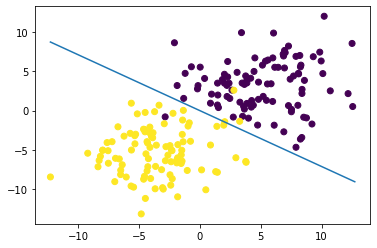

In [21]:
X_rl = np.arange(data[: ,0].min(),data[: ,0].max()+1)
Y_rl = (-w[0]/w[1])*X_rl
plt.plot(X_rl,Y_rl)
plt.scatter(X[: ,0],X[: ,1], c=y)
plt.show()

## Grafica del ejecicio 3

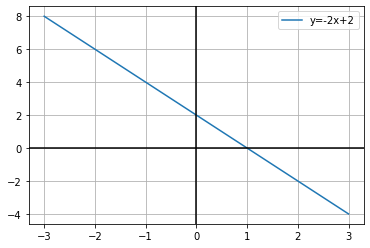

In [22]:
def f1(x):
    return -2*(x)+2

x = range(-3, 4)


plt.plot(x, [f1(i) for i in x], label="y=-2x+2")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.legend()
plt.show()